# Analysis of Calgary Business License Data

Dataset provided by: The City of Calgary

In [167]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
sns.set(style='white',context='notebook')
%matplotlib inline

In [5]:
# Import data.
df = pd.read_csv('Calgary_Business_Licences.csv')
df.head()

,TRADENAME,ADDRESS,LICENCETYPES,COMDISTNM,JOBSTATUSDESC,JOBCREATED,longitude,latitude,location,Count
0,MORE CONVENIENCE STORE,11201 30 ST SW,RETAIL DEALER - PREMISES,CEDARBRAE,RENEWAL LICENSED,2009/06/11,-114.130062,50.953449,"(50.9534492575157, -114.130062103058)",1
1,CUBEX,9304 HORTON RD SW,WHOLESALER,HAYSBORO,RENEWAL LICENSED,2014/01/07,-114.075268,50.971295,"(50.9712947174267, -114.075267980215)",1
2,RESTAURANT AT LOUGHEED HOUSE (THE),707 13 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),BELTLINE,RENEWAL LICENSED,2009/10/16,-114.077150,51.040573,"(51.0405732559672, -114.077149598877)",1
3,WESTECK WINDOWS AND DOORS,#4 2015 32 AV NE,RETAIL DEALER - PREMISES,SOUTH AIRWAYS,RENEWAL LICENSED,2015/12/07,-114.010275,51.080509,"(51.0805090794563, -114.010274803475)",1
4,ARBOUR LAKE LIQUOR,37 CROWFOOT RI NW,LIQUOR STORE,ARBOUR LAKE,RENEWAL LICENSED,2014/12/10,-114.211064,51.125870,"(51.1258701250349, -114.211064199092)",1


In [7]:
# Describe the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30660 entries, 0 to 30659
Data columns (total 10 columns):
TRADENAME        30660 non-null object
ADDRESS          30660 non-null object
LICENCETYPES     30660 non-null object
COMDISTNM        30660 non-null object
JOBSTATUSDESC    30660 non-null object
JOBCREATED       30660 non-null object
longitude        30660 non-null float64
latitude         30660 non-null float64
location         30660 non-null object
Count            30660 non-null int64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.3+ MB


Unique values for categorical columns:

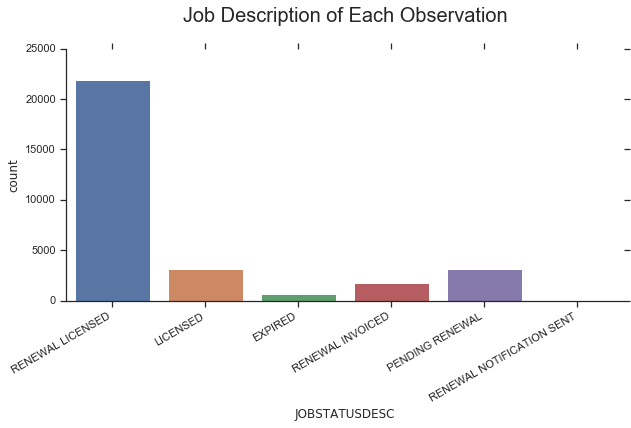

In [176]:
fig,ax=plt.subplots(figsize=[10,5])
sns.countplot(df['JOBSTATUSDESC'],ax=ax)
ax.set_title('Job Description of Each Observation\n',fontsize=20)
sns.despine(ax=ax)
plt.gcf().autofmt_xdate()

## Timeline of Business License Data

The JOBCREATED variable is the date (yyyy/mm/dd) of the datapoint. 

On that date, one of the following transactions occurred:

- RENEWAL LICENSED
- LICENSED
- PENDING RENEWAL
- RENEWAL INVOICED
- EXPIRED
- RENEWAL NOTIFICATION SENT

These are different transactions and should be analyzed accordingly. 

Let's start with a full timeline of licensed businesses (those for the first time), and stratify by COMMDISTNM (community name).

Convert dates to datetime objects.

In [177]:
import datetime
year, month, day = [int(x[:4]) for x in df['JOBCREATED']], [int(x[5:7]) for x in df['JOBCREATED']] ,[int(x[8:10]) for x in df['JOBCREATED']] 
dates = []

for i in range(len(year)):
    dt = pd.datetime(year=year[i],month=month[i],day=day[i])
    dates.append(dt)

# Assign a date column.
df['Date'] = dates

Let's plot the timeline of each individual community. 

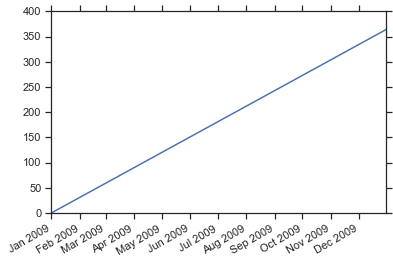

In [178]:
x = [datetime.datetime(year=2009,month=1,day=1) + datetime.timedelta(days=i) for i in range(365)]
y = [i for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()